<a href="https://colab.research.google.com/github/Sshubam/PyTorch-Code/blob/main/PyTorch_1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N = 20

X = np.random.random(N)*10 - 5
Y = 0.5*X-1 + np.random.randn(N)
X, Y

(array([-3.88858239,  2.19462898, -0.93027711,  1.024305  ,  4.69681252,
         2.9810403 , -4.06827437,  2.89170046,  4.39541677,  1.55365277,
         1.80323133, -2.88027176, -1.88508664,  1.37365792,  4.91708981,
        -1.26072931,  4.57486737,  0.62601158, -3.25836573,  3.38156986]),
 array([-1.8319707 ,  0.49976186, -2.04108282, -0.49327903,  2.09953193,
        -0.3936303 , -3.15378767,  1.11325051,  0.76387569, -1.24767186,
        -1.18301887, -2.73913846, -4.64779251, -0.53423856,  2.16933504,
        -1.6345316 ,  2.22413104, -2.28740004, -2.04208004,  0.34129977]))

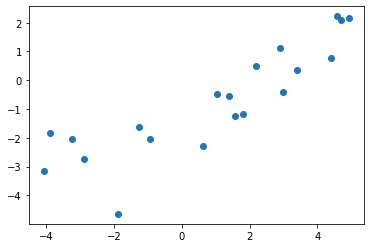

In [ ]:
plt.scatter(X, Y)

In [ ]:
model = nn.Linear(1, 1)
criterion=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))
X, Y

(array([[-3.88858239],
        [ 2.19462898],
        [-0.93027711],
        [ 1.024305  ],
        [ 4.69681252],
        [ 2.9810403 ],
        [-4.06827437],
        [ 2.89170046],
        [ 4.39541677],
        [ 1.55365277],
        [ 1.80323133],
        [-2.88027176],
        [-1.88508664],
        [ 1.37365792],
        [ 4.91708981],
        [-1.26072931],
        [ 4.57486737],
        [ 0.62601158],
        [-3.25836573],
        [ 3.38156986]]), array([[-1.8319707 ],
        [ 0.49976186],
        [-2.04108282],
        [-0.49327903],
        [ 2.09953193],
        [-0.3936303 ],
        [-3.15378767],
        [ 1.11325051],
        [ 0.76387569],
        [-1.24767186],
        [-1.18301887],
        [-2.73913846],
        [-4.64779251],
        [-0.53423856],
        [ 2.16933504],
        [-1.6345316 ],
        [ 2.22413104],
        [-2.28740004],
        [-2.04208004],
        [ 0.34129977]]))

In [ ]:
type(inputs)

torch.Tensor

In [ ]:
n_epochs = 30
losses = []
for it in range(n_epochs):
  optimizer.zero_grad()
  #Forward pass 
  outputs=model(inputs)
  loss = criterion(outputs, targets)
  #keep the loss so we can plot it later
  losses.append(loss.item())
  #BAckward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 16.5553
Epoch 2/30, Loss: 1.0988
Epoch 3/30, Loss: 1.0030
Epoch 4/30, Loss: 0.9728
Epoch 5/30, Loss: 0.9481
Epoch 6/30, Loss: 0.9276
Epoch 7/30, Loss: 0.9106
Epoch 8/30, Loss: 0.8965
Epoch 9/30, Loss: 0.8849
Epoch 10/30, Loss: 0.8752
Epoch 11/30, Loss: 0.8672
Epoch 12/30, Loss: 0.8606
Epoch 13/30, Loss: 0.8552
Epoch 14/30, Loss: 0.8506
Epoch 15/30, Loss: 0.8469
Epoch 16/30, Loss: 0.8438
Epoch 17/30, Loss: 0.8412
Epoch 18/30, Loss: 0.8391
Epoch 19/30, Loss: 0.8373
Epoch 20/30, Loss: 0.8358
Epoch 21/30, Loss: 0.8346
Epoch 22/30, Loss: 0.8336
Epoch 23/30, Loss: 0.8328
Epoch 24/30, Loss: 0.8321
Epoch 25/30, Loss: 0.8316
Epoch 26/30, Loss: 0.8311
Epoch 27/30, Loss: 0.8307
Epoch 28/30, Loss: 0.8304
Epoch 29/30, Loss: 0.8301
Epoch 30/30, Loss: 0.8299


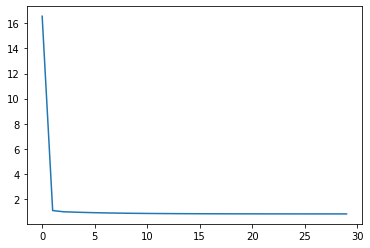

In [ ]:
plt.plot(losses);

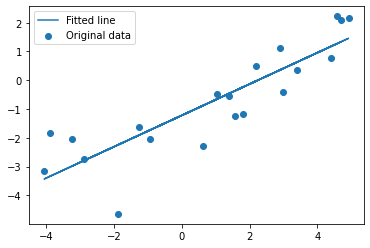

In [ ]:
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-3.336196  ],
       [-0.02478433],
       [-1.7258348 ],
       [-0.66185313],
       [ 1.3372858 ],
       [ 0.40330064],
       [-3.4340117 ],
       [ 0.35466838],
       [ 1.1732202 ],
       [-0.37370133],
       [-0.23784262],
       [-2.7873192 ],
       [-2.2455878 ],
       [-0.471682  ],
       [ 1.4571941 ],
       [-1.9057174 ],
       [ 1.2709043 ],
       [-0.8786652 ],
       [-2.9931357 ],
       [ 0.6213299 ]], dtype=float32)

In [ ]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.54435253]] [-1.2194362]
